You are given an integer array nums. Two players are playing a game with this array: player 1 and player 2.

Player 1 and player 2 take turns, with player 1 starting first. Both players start the game with a score of 0. At each turn, the player takes one of the numbers from either end of the array (i.e., nums[0] or nums[nums.length - 1]) which reduces the size of the array by 1. The player adds the chosen number to their score. The game ends when there are no more elements in the array.

Return true if Player 1 can win the game. If the scores of both players are equal, then player 1 is still the winner, and you should also return true. You may assume that both players are playing optimally.

 

Example 1:

Input: nums = [1,5,2]
Output: false
Explanation: Initially, player 1 can choose between 1 and 2. 
If he chooses 2 (or 1), then player 2 can choose from 1 (or 2) and 5. If player 2 chooses 5, then player 1 will be left with 1 (or 2). 
So, final score of player 1 is 1 + 2 = 3, and player 2 is 5. 
Hence, player 1 will never be the winner and you need to return false.

Example 2:

Input: nums = [1,5,233,7]
Output: true
Explanation: Player 1 first chooses 1. Then player 2 has to choose between 5 and 7. No matter which number player 2 choose, player 1 can choose 233.
Finally, player 1 has more score (234) than player 2 (12), so you need to return True representing player1 can win.

 

Constraints:

    1 <= nums.length <= 20
    0 <= nums[i] <= 107

Accepted
117,479
Submissions
232,628

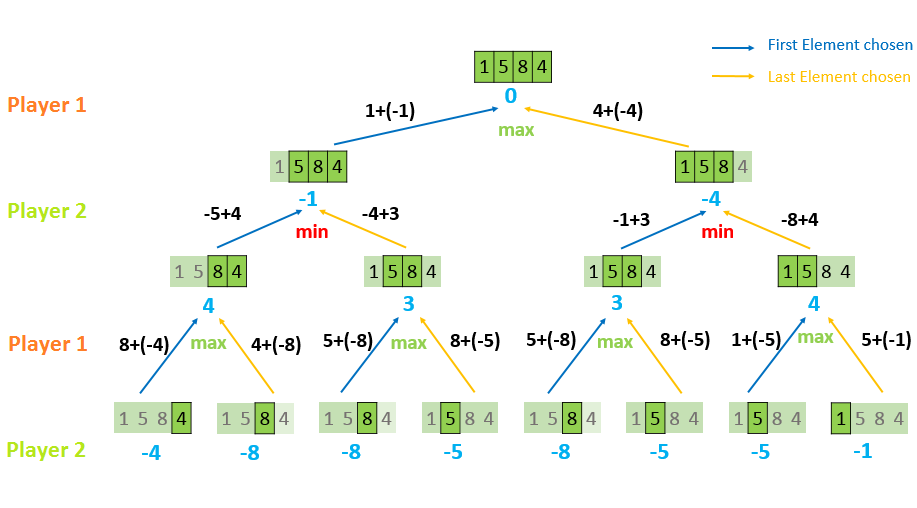

This is essentially a zero-sum game since the player1_score + player2_score = total_score. We can easily leverage on the minimax framework:

Player 1 wants to maximize the score
Player 2 wants to minimize the score

Now we use recursion to find out all the possible cases and find the max score (that player 1 can get)
Since we are going to traverse many repeated scenarios, we can use a cache to speed up the dfs process (or memoization, top-down dp)

In [ ]:
from typing import List
from functools import cache

class Solution:
    def PredictTheWinner(self, nums: List[int]) -> bool:
        @cache
        def step(l, r, player):
            if r < l: 
                return 0
            return player * max([
                player * (step(l + 1, r, -player) + player * nums[l]), 
                player * (step(l, r - 1, -player) + player * nums[r]), 
            ])
        
        return step(0, len(nums) - 1, 1) >= 0

In [15]:
s = Solution()
s.PredictTheWinner([1, 5, 2])

False

In [16]:
s.PredictTheWinner([1, 5, 233, 7])

True